In [1]:
from MRF import *

In [2]:
data_in = pd.read_csv(f"../Datasets/finance.csv", index_col = "Date")

In [3]:
close_prices = data_in.iloc[:, 0]

In [4]:
data_in = data_in.iloc[:, 1:]

In [5]:
oos_pos = np.arange(len(data_in.iloc[:-350]), len(data_in.iloc[:-1])+1)

In [6]:
MRF = MacroRandomForest(data = data_in,
                        y_pos = 0,
                        x_pos = np.arange(1,5), 
                        fast_rw = True, 
                        B = 50, 
                        mtry_frac = 0.3, 
                        resampling_opt = 2,
                        oos_pos = oos_pos, 
                        trend_push = 2,
                        quantile_rate = 0.3, 
                        print_b = True, 
                        parallelise = True)

In [7]:
mrf_output = MRF._ensemble_loop()

In [8]:
trading_statistics = MRF.financial_evaluation(model_forecasts = mrf_output['pred'], 
                         close_prices = close_prices)

daily_profit = trading_statistics[0]
cumulative_profit = trading_statistics[1]
annualised_return = trading_statistics[2]
sharpe_ratio = trading_statistics[3]
maximum_drawdown = trading_statistics[4]

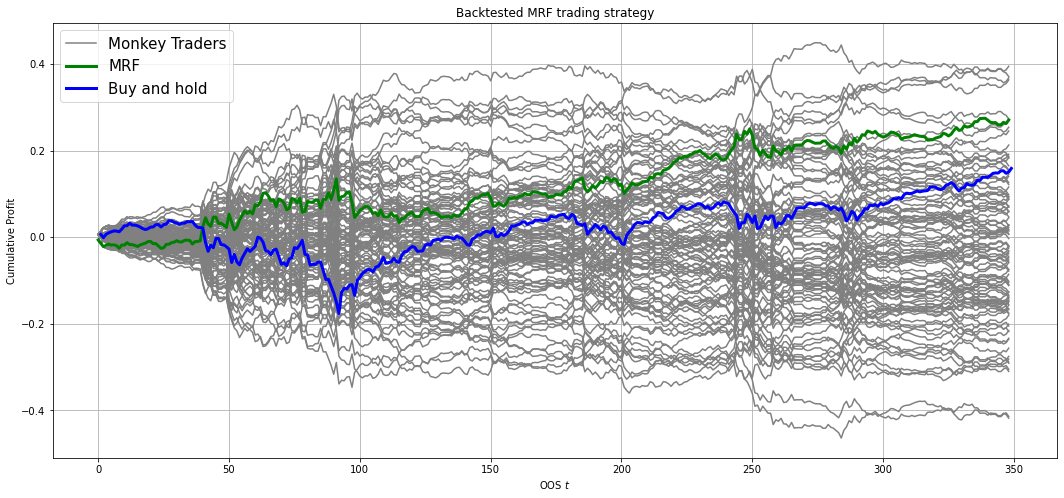

In [9]:
MRF.monkey_trader_plot(close_prices)